In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd
import datetime
import random

# ML
from sklearn import datasets
import tensorflow as tf
import keras

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set_style("whitegrid");
sns.set_color_codes(palette='pastel');

# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
from pprint import pprint

# This is a little recursive helper function converts all nested ndarrays to python list of lists so that pretty printer knows what to do.

def arrayToList(arr):
    if type(arr) == type(np.array):
        #If the passed type is an ndarray then convert it to a list and
        #recursively convert all nested types
        return arrayToList(arr.tolist())
    else:
        #if item isn't an ndarray leave it as is.
        return arr
    
# Suppress exponential notation, define an appropriate float formatter
# Specify stdout line width and let pretty print do the work
np.set_printoptions(suppress=True, formatter={'float_kind':'{:12.6f}'.format}, linewidth=120)

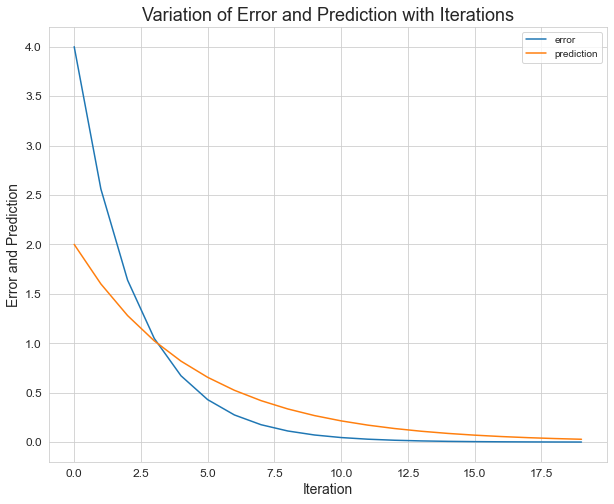

In [3]:
# weights = np.array([0.5,0.48,-0.7])
weights = np.array([1, 1, 1])
alpha = 0.1

streetlights = np.array( [ [ 1, 0, 1 ],
                           [ 0, 1, 1 ],
                           [ 0, 0, 1 ],
                           [ 1, 1, 1 ],
                           [ 0, 1, 1 ],
                           [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

x = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

error_lst, prediction_lst = [], []

for iteration in range(20):
    prediction = weights.dot(x)
    error = (goal_prediction - prediction) ** 2
    delta = prediction - goal_prediction
    weights = weights - (alpha * (x * delta))
    error_lst.append(error)
    prediction_lst.append(prediction)

#     print("Error:" + str(error) + " Prediction:" + str(prediction))

err_df = pd.DataFrame(list(zip(error_lst, prediction_lst)), columns=['error', 'prediction'])
ax = err_df.plot(figsize=(10, 8), title = 'Variation of Error and Prediction with Iterations');
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error and Prediction")
plt.show()

### Learning the whole dataset (multiple input $\rightarrow$ multiple output):

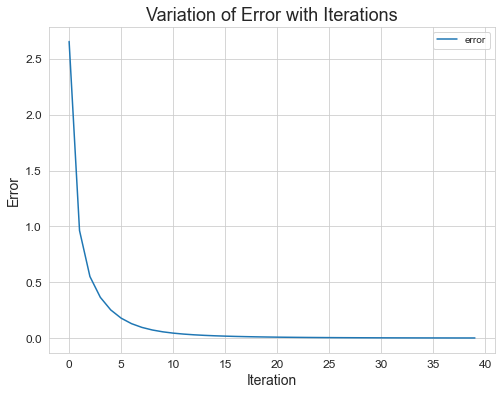

In [4]:
import numpy as np

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

input = streetlights[0] # [1,0,1]
goal_prediction = walk_vs_stop[0] # equals 0... i.e. "stop"

err_lst = []    

for iteration in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        prediction = input.dot(weights)
        
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))	
#         print("Prediction:" + str(prediction))
    err_lst.append(error_for_all_lights)
#     print("Error:" + str(error_for_all_lights) + "\n")
    
err_df = pd.DataFrame(err_lst,  columns=['error'])
ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error with Iterations')
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
plt.show()

## My first Deep Neural Network

In [5]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x 

alpha = 0.2
hidden_size = 4

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0,weights_0_1))
layer_2 = np.dot(layer_1,weights_1_2)

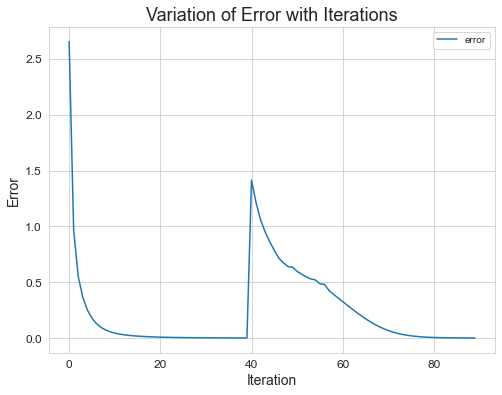

In [6]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise
alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

# lst_alpha = [0.01, 0.05, 0.1, 0.2]  

for iteration in range(50):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

        layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
        layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

#     if(iteration % 10 == 9):
#         print("Error:" + str(layer_2_error))
    err_lst.append(layer_2_error)
    
err_df = pd.DataFrame(err_lst,  columns=['error'])
ax = err_df.plot(figsize=(8, 6), title = 'Variation of Error with Iterations')
ax.title.set_size(18)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
plt.show()

## Deep Neural Network trained on MNIST Dataset
### Train

In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10)) # Initialize 0 matrix of dim. 1000x10
for i,l in enumerate(labels):               # If the label is 5 for 3rd index, the value of (3, 5) elem.of the  
    one_hot_labels[i][l] = 1                # one-hot matrix is 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1
    
np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1



for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))
        

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))

 I:349 Train-Err:0.108 Train-Acc:1.099

### Test

In [8]:
if(j % 10 == 0 or j == iterations-1):
    error, correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_cnt/float(len(test_images))) + "\n")
    print()

 Test-Err:0.653 Test-Acc:0.7073



## Dropout 
### Dropout in code

In [9]:
i = 0
layer_0 = images[i:i+1]
dropout_mask = np.random.randint(2,size=layer_1.shape)

layer_1 *= dropout_mask * 2
layer_2 = np.dot(layer_1, weights_1_2)

error += np.sum((labels[i:i+1] - layer_2) ** 2)

correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i+i+1]))

layer_2_delta = (labels[i:i+1] - layer_2)
layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

layer_1_delta *= dropout_mask

weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

### Full 3 Layer NN code for MNIST: Full GD

In [10]:
import numpy as np
import sys
from keras.datasets import mnist
np.random.seed(1)

def relu(x):
    return (x >= 0) * x # returns x if x > 0
                        # returns 0 otherwise

def relu2deriv(output):
    return output >= 0 #returns 1 for input > 0

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10)) # Initialize 0 matrix of dim. 1000x10
for i,l in enumerate(labels):               # If the label is 5 for 3rd index, the value of (3, 5) elem.of the  
    one_hot_labels[i][l] = 1                # one-hot matrix is 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

train_err_lst, train_acc_lst, test_err_lst, test_acc_lst = [], [], [], []

for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%5 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

#         sys.stdout.write("\n" + \
#                          "I:" + str(j) + \
#                          " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
#                          " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
#                          " Train-Err:" + str(error/ float(len(images)))[0:5] +\
#                          " Train-Acc:" + str(correct_cnt/ float(len(images))))
        
        train_err_lst.append(error/ float(len(images)))
        train_acc_lst.append(correct_cnt/ float(len(images)))
        test_err_lst.append(test_error/ float(len(test_images)))
        test_acc_lst.append(test_correct_cnt/ float(len(test_images)))

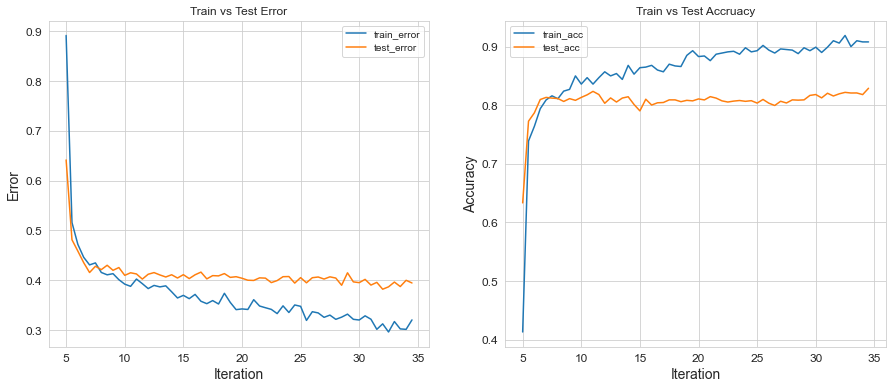

In [11]:
df = pd.DataFrame(list(zip(train_err_lst, train_acc_lst, test_err_lst, test_acc_lst)), 
                  columns=['train_error', 'train_acc', 'test_error', 'test_acc'])

import matplotlib.ticker as mticker

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
df[['train_error', 'test_error']].plot(ax = axes[0], title = 'Train vs Test Error')
df[['train_acc', 'test_acc']].plot(ax = axes[1], title = 'Train vs Test Accruacy')
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Error")
axes[0].xaxis.set_major_locator(mticker.MultipleLocator(5))
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Accuracy")
axes[1].xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.show()

### Full 3 Layer NN code for MNIST: Batch GD

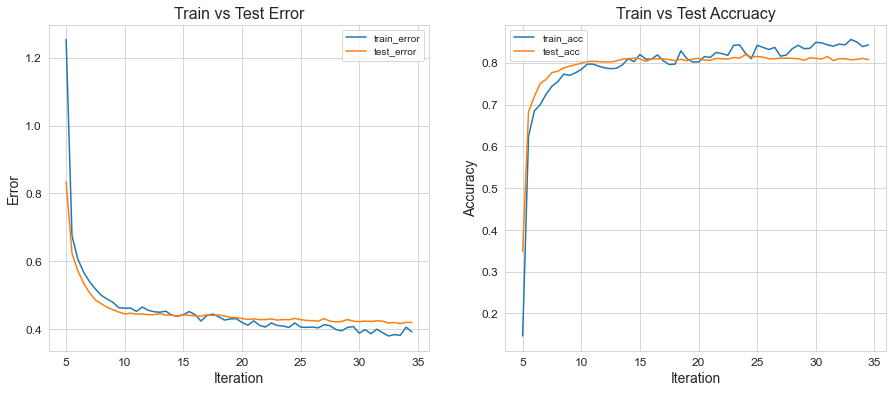

In [12]:
def relu(x):
    return (x >= 0) * x # returns x if x > 0

def relu2deriv(output):
    return output >= 0 # returns 1 for input > 0

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10)) # Initialize 0 matrix of dim. 1000x10
for i,l in enumerate(labels):               # If the label is 5 for 3rd index, the value of (3, 5) elem.of the  
    one_hot_labels[i][l] = 1                # one-hot matrix is 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1


batch_size = 100
alpha, iterations = (0.001, 300)
pixels_per_image, num_labels, hidden_size = (784, 10, 100)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

train_err_lst, train_acc_lst, test_err_lst, test_acc_lst = [], [], [], []

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

            layer_2_delta = (labels[batch_start:batch_end]-layer_2)/batch_size
            layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)
            layer_1_delta *= dropout_mask

            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
            
    if(j%5 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
            
        train_err_lst.append(error/ float(len(images)))
        train_acc_lst.append(correct_cnt/ float(len(images)))
        test_err_lst.append(test_error/ float(len(test_images)))
        test_acc_lst.append(test_correct_cnt/ float(len(test_images)))

#         sys.stdout.write("\n" + \
#                          "I:" + str(j) + \
#                          " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
#                          " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
#                          " Train-Err:" + str(error/ float(len(images)))[0:5] +\
#                          " Train-Acc:" + str(correct_cnt/ float(len(images))))

df = pd.DataFrame(list(zip(train_err_lst, train_acc_lst, test_err_lst, test_acc_lst)), 
                  columns=['train_error', 'train_acc', 'test_error', 'test_acc'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
df[['train_error', 'test_error']].plot(ax = axes[0], title = 'Train vs Test Error')
df[['train_acc', 'test_acc']].plot(ax = axes[1], title = 'Train vs Test Accruacy')
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Error")
axes[0].set_xticklabels(df.index*5)
axes[0].title.set_size(16)
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Accuracy")
axes[1].set_xticklabels(df.index*5)
axes[1].title.set_size(16)
plt.show()

### Full 3 Layer NN code for MNIST: Batch GD with Activation functions

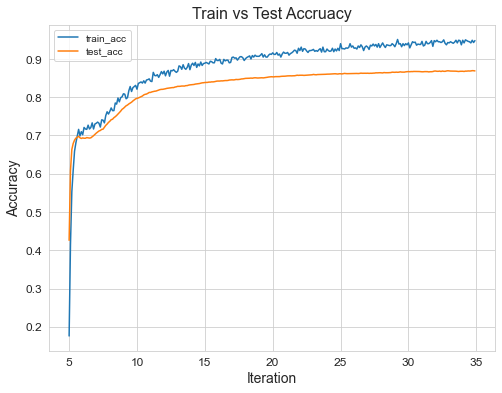

In [18]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = (2, 300, 100)
pixels_per_image, num_labels = (784, 10)
batch_size = 100

weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

train_acc_lst, test_acc_lst = [], []

for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1,weights_1_2))

        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

        layer_2_delta = (labels[batch_start:batch_end]-layer_2) / (batch_size * layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    test_correct_cnt = 0

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
    
    train_acc_lst.append(correct_cnt/ float(len(images)))
    test_acc_lst.append(test_correct_cnt/ float(len(test_images)))
    
#     if(j % 10 == 5):
#         sys.stdout.write("\n"+ \
#          "I:" + str(j) + \
#          " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
#          " Train-Acc:" + str(correct_cnt/float(len(images))))
        
df = pd.DataFrame(list(zip(train_acc_lst, test_acc_lst)), 
                  columns=['train_acc', 'test_acc'])

fig, axes = plt.subplots(figsize = (8, 6))
df[['train_acc', 'test_acc']].plot(ax = axes, title = 'Train vs Test Accruacy')
axes.set_xlabel("Iteration")
axes.set_ylabel("Accuracy")
axes.set_xticklabels(df.index*5)
axes.title.set_size(16)
plt.show()

### Full 3 Layer NN code: on a synthetic dataset

In [13]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples=10000, n_features=5, n_classes=4, 
                                    n_clusters_per_class=1, shuffle=True, random_state=1)
print(f'X type: {type(X)}, X shape: {X.shape}, X dimention: {X.ndim}')
print(f'y type: {type(y)}, y shape: {y.shape}, y dimention: {y.ndim}')

X type: <class 'numpy.ndarray'>, X shape: (10000, 5), X dimention: 2
y type: <class 'numpy.ndarray'>, y shape: (10000,), y dimention: 1


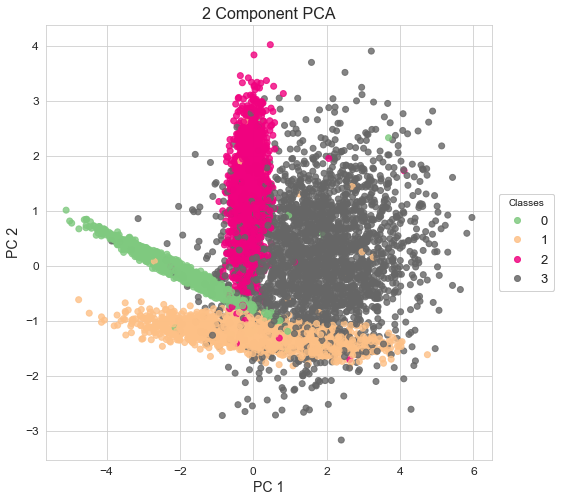

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])

X_pca = pipeline.fit_transform(X)
y = y.astype(int)

df = pd.DataFrame(np.column_stack((X_pca, y)), columns = ['PC 1', 'PC 2', 'target']).astype({"target": int})


fig, ax = plt.subplots(figsize = (8, 8))
scatter = ax.scatter(df['PC 1'], df['PC 2'], c=df.target, alpha=0.8, cmap='Accent')
legend = ax.legend(*scatter.legend_elements(), loc='center left', 
                   bbox_to_anchor=(1, 0.5), fontsize = 13, title="Classes")
ax.add_artist(legend)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('2 Component PCA', fontsize = 16)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

def relu(x):
    return (x >= 0) * x # returns x if x > 0
                        # returns 0 otherwise

def relu2deriv(output):
    return output >= 0 #returns 1 for input > 0

def onehot(arr):
    one_hot_labels = np.zeros((len(arr),4))
    for i,l in enumerate(arr):
        one_hot_labels[i][l] = 1
        
    return one_hot_labels

y_train = onehot(y_train)
y_test = onehot(y_test)

alpha, iterations, hidden_size = (0.002, 300, 10)

weights_0_1 = 0.2*np.random.random((5, hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size, 4)) - 0.1
b = np.zeros(10).reshape(1, 10)

train_err_lst, train_acc_lst, test_err_lst, test_acc_lst = [], [], [], []

for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(X_train)):
        layer_0 = X_train[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1) + b)
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((y_train[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(y_train[i:i+1]))
        layer_2_delta = (y_train[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask
        b_delta = np.sum(layer_1_delta, axis = 0)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        b += -alpha*b_delta

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(X_test)):
            layer_0 = X_test[i:i+1]
            layer_1 = relu(np.dot(layer_0, weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((y_test[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(y_test[i:i+1]))

        train_err_lst.append(error/ float(len(X_train)))
        train_acc_lst.append(correct_cnt/ float(len(X_train)))
        test_err_lst.append(test_error/ float(len(X_test)))
        test_acc_lst.append(test_correct_cnt/ float(len(X_test)))
        
        sys.stdout.write("\n" + \
                     "I:" + str(j) + \
                     " Test-Err:" + str(test_error/ float(len(X_test)))[0:5] +\
                     " Test-Acc:" + str(test_correct_cnt/ float(len(X_test)))+\
                     " Train-Err:" + str(error/ float(len(X_train)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/ float(len(X_train))))
        print()


I:0 Test-Err:0.469 Test-Acc:0.8145 Train-Err:0.760 Train-Acc:0.5115
I:10 Test-Err:0.741 Test-Acc:0.7765 Train-Err:0.686 Train-Acc:0.656625
I:20 Test-Err:0.762 Test-Acc:0.807 Train-Err:0.704 Train-Acc:0.637125
I:30 Test-Err:0.807 Test-Acc:0.712 Train-Err:0.713 Train-Acc:0.625
I:40 Test-Err:0.747 Test-Acc:0.7495 Train-Err:0.734 Train-Acc:0.608375
I:50 Test-Err:0.692 Test-Acc:0.7815 Train-Err:0.751 Train-Acc:0.597375
I:60 Test-Err:0.923 Test-Acc:0.676 Train-Err:0.753 Train-Acc:0.588125
I:70 Test-Err:0.853 Test-Acc:0.8075 Train-Err:0.776 Train-Acc:0.5695
I:80 Test-Err:1.342 Test-Acc:0.7345 Train-Err:0.764 Train-Acc:0.61825
I:90 Test-Err:1.083 Test-Acc:0.7975 Train-Err:0.809 Train-Acc:0.591625
I:100 Test-Err:0.986 Test-Acc:0.8025 Train-Err:0.803 Train-Acc:0.57925
I:110 Test-Err:1.295 Test-Acc:0.7545 Train-Err:0.822 Train-Acc:0.57
I:120 Test-Err:1.083 Test-Acc:0.7825 Train-Err:0.820 Train-Acc:0.573625
I:130 Test-Err:2.010 Test-Acc:0.7555 Train-Err:0.804 Train-Acc:0.554125
I:140 Test-Err:1.3